## What is this notebook for?

This scripts it to test:
- the reshaping of the 3d array
- test of histogram calculations
- test of cumulative histogram comparison
- select best feature

NOTE: due to updates of the functions, some of the cells might don't work anymore

#### Import libraries

In [781]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from functions.function_resample_4d_array import resample_4d_array
from functions.function_plot_3d_array_colored import plot_3d_array_colored
from functions.function_get_feature_positions import get_feature_positions

#### create an entire list of arrays

the shape should be the following (sample, x, y, z)


Resampling in progress...


100%|██████████| 100/100 [00:00<00:00, 126.81it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

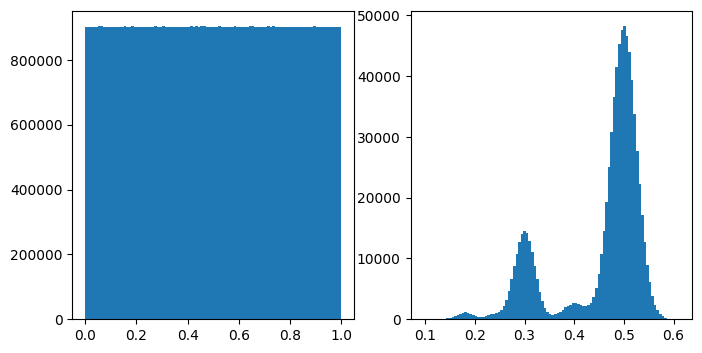

In [782]:
# create an entire list of arrays
# the shape should be the following (sample, x, y, z) = (100, 91, 109, 91)
arr_big = np.random.rand(100, 91, 109, 91)

# reshape the list of arrays
arr_small = resample_4d_array(arr_big, 5)

# plot histogram of big and small arr
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.hist(arr_big.flatten(), bins=100)
ax2 = fig.add_subplot(122)
ax2.hist(arr_small.flatten(), bins=100)
plt.show

In [783]:
arr_small.shape

(100, 19, 22, 19)

#### ground truth array

In [784]:
# array which represents the ground truth with 0 and 1
np.random.seed(20)
arr_gt = np.random.rand(100)
arr_gt[arr_gt < 0.5] = 0
arr_gt[arr_gt >= 0.5] = 1

# count the number of 0 and 1 in the ground truth
print(f"number of 0: {np.count_nonzero(arr_gt == 0)}",
      f"number of 1: {np.count_nonzero(arr_gt == 1)}")

number of 0: 43 number of 1: 57


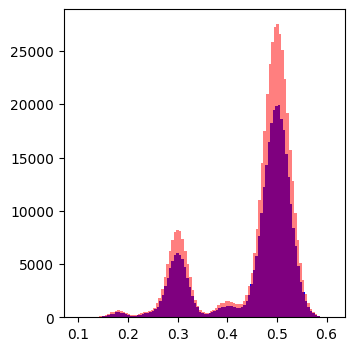

In [785]:
# plot histogram of arr_small, colors are different for 0 and 1
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.hist(arr_small[arr_gt == 0].flatten(), bins=100, color='blue')
ax.hist(arr_small[arr_gt == 1].flatten(), bins=100, color='red', alpha=0.5)
plt.show()

### manipulate data to see importance of a feature

In [786]:
# flatten the arr_small into a 2d array (keep the sample dimension)
arr_small_2d = arr_small.reshape(arr_small.shape[0], -1)
print(f"shape of arr_small_2d: {arr_small_2d.shape}")

shape of arr_small_2d: (100, 7942)


In [787]:
# create a histogram along the sample dimension 
df_small = (pd.DataFrame(arr_small_2d)
            # add a column "ground_truth" as categorical which contains the ground truth
            .assign(ground_truth=pd.Categorical(arr_gt))
            )
# df_small.hist(bins=100, figsize=(8, 4))
df_small

,0,1,2,3,4,5,6,7,8,9,...,7933,7934,7935,7936,7937,7938,7939,7940,7941,ground_truth
0,0.169612,0.287115,0.267216,0.275974,0.292110,0.309563,0.317175,0.317421,0.318605,0.314156,...,0.252146,0.246157,0.248025,0.224416,0.272355,0.237474,0.225354,0.249329,0.148723,1.0
1,0.174351,0.312157,0.327182,0.299184,0.318027,0.297137,0.307573,0.300818,0.300708,0.293664,...,0.214095,0.247493,0.249782,0.228567,0.204650,0.273847,0.222434,0.255746,0.142763,1.0
2,0.193988,0.290224,0.265105,0.288137,0.269287,0.269702,0.311207,0.259355,0.309963,0.319975,...,0.250615,0.224553,0.217835,0.226266,0.208134,0.237345,0.222377,0.243450,0.153754,1.0
3,0.204246,0.321680,0.307463,0.295943,0.309413,0.272664,0.284972,0.288657,0.273974,0.280432,...,0.243889,0.265660,0.216987,0.233821,0.219136,0.245737,0.234042,0.250238,0.130056,1.0
4,0.164443,0.280707,0.308290,0.263307,0.323898,0.281310,0.320523,0.335187,0.328307,0.300530,...,0.202840,0.237048,0.227414,0.214180,0.214628,0.267634,0.216995,0.238549,0.143976,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.193887,0.311407,0.295306,0.306601,0.309750,0.262811,0.308039,0.253587,0.299421,0.300691,...,0.236482,0.205081,0.243518,0.245286,0.244349,0.251241,0.260278,0.221804,0.124396,1.0
96,0.170302,0.309465,0.305120,0.326540,0.266642,0.276798,0.312877,0.278921,0.303688,0.306108,...,0.234012,0.255663,0.260661,0.240933,0.239136,0.241369,0.249543,0.244317,0.131487,1.0
97,0.182120,0.310193,0.316029,0.310702,0.299148,0.253041,0.313074,0.305207,0.295551,0.297633,...,0.246526,0.216176,0.224410,0.222098,0.252650,0.224410,0.233877,0.232398,0.143704,1.0
98,0.179467,0.296477,0.295687,0.279144,0.313435,0.265706,0.303281,0.310336,0.268573,0.265657,...,0.236000,0.218042,0.218620,0.226480,0.263035,0.239088,0.247684,0.219875,0.113825,1.0


<Axes: >

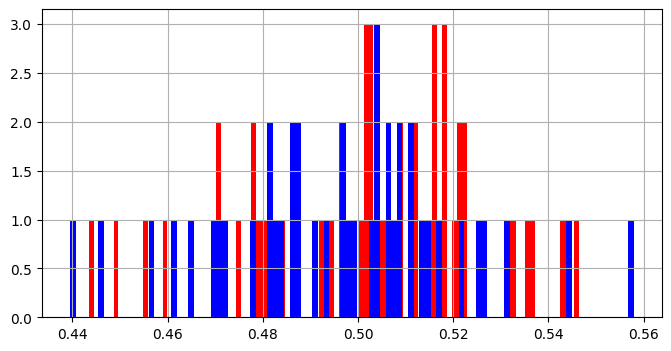

In [788]:
# create histogram for one column
col_nr = 501
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')


<Axes: >

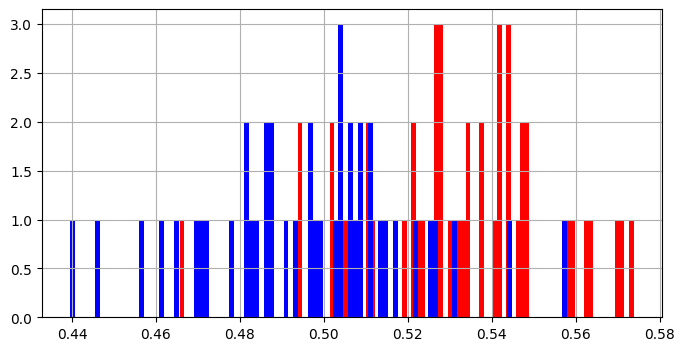

In [789]:
# increase two values of the column for the ground truth 1
changed_col = [col_nr, col_nr * 2 + 123]
df_small.loc[df_small["ground_truth"]==1 , changed_col] *= 1.05

# create histogram for one column
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')

### Analysis with mean of histogram

In [790]:
# calculate difference between the two histograms
diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col_nr].mean() 
              - df_small.loc[df_small["ground_truth"]==0 , col_nr].mean())
print(f"difference between the two histograms: {diff}")

difference between the two histograms: 0.03054008231390254


column number = 501, difference = 0.03054008231390254
column number = 1125, difference = 0.02542575445385059
column number = 802, difference = 0.02068403998065127
column number = 1988, difference = 0.020633522766124512
column number = 2330, difference = 0.01884953434527814
column number = 2711, difference = 0.018078110036117145
column number = 3051, difference = 0.018065071409874622
column number = 3568, difference = 0.017942092350066552
column number = 4232, difference = 0.017605651958501056
column number = 6727, difference = 0.017462655658897652


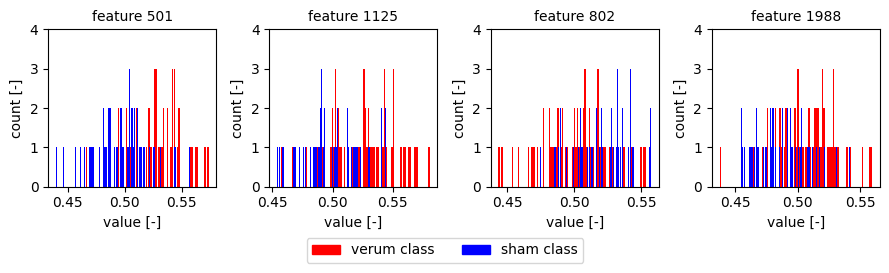

In [791]:
# find the columns with the biggest difference
diff_dict = {}
for col in range(df_small.shape[1] - 1):  # -1 because the last column is the ground truth
    diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col].mean() 
                  - df_small.loc[df_small["ground_truth"]==0 , col].mean())
    diff_dict[col] = diff
diff_list = sorted(diff_dict.items(), key=lambda x:x[1], reverse=True)  # creates a list of tuples

# print the first 10 pairs of the diff_dict
for i in range(10):
    print(f"column number = {diff_list[i][0]}, difference = {diff_list[i][1]}")

fig, axs = plt.subplots(1, 4, figsize=(9, 2.5))  # Simplify subplot creation
for i in range(4):
    col = diff_list[i][0]
    ax = axs[i]
    line1, _, patches1 = ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], bins=100, color='red')
    line2, _, patches2 = ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], bins=100, color='blue')

    ax.set_title(f"feature {col}", fontsize=10)
    ax.set_xlabel(f"value [-]")
    ax.set_ylabel(f"count [-]")
    ax.set_ylim([0, 4])

# Create patches for the legend
patches = [mpatches.Patch(color='red', label='verum class'),
           mpatches.Patch(color='blue', label='sham class')]

# Add the legend to the plot
fig.legend(handles=patches, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

# save the figure as svg
fig.savefig("../figures/histogram.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

### Analysis with diff of cumulative histogram

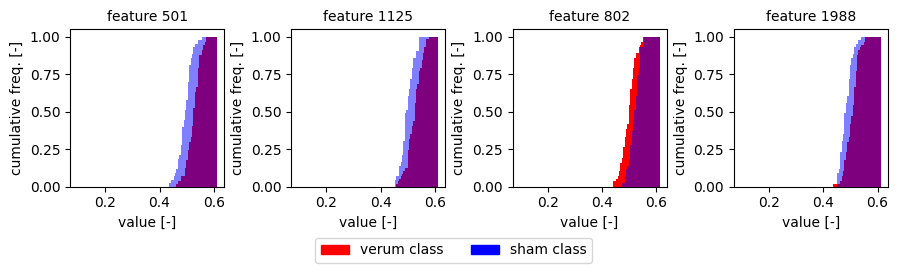

In [792]:
# min and max values of the entire array to set the same range for all histograms (to make sure the binning is the same)
max_value = np.max(df_small.iloc[:, :-1].values)
min_value = np.min(df_small.iloc[:, :-1].values)

# create a cumulative histogram
fig, axs = plt.subplots(1, 4, figsize=(9, 2.5))
for i in range(4):
    col = diff_list[i][0]
    ax = axs[i]
    ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], density=True,
            bins=100, color='red', cumulative=True, range=(min_value, max_value))
    ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], density=True,
            bins=100, color='blue', cumulative=True, range=(min_value, max_value), alpha=0.5)
    # add title, x and y label
    ax.set_title(f"feature {col}", fontsize=10)
    ax.set_xlabel(f"value [-]")
    ax.set_ylabel(f"cumulative freq. [-]")

# Create patches for the legend
patches = [mpatches.Patch(color='red', label='verum class'),
           mpatches.Patch(color='blue', label='sham class')]

# Add the legend to the plot
fig.legend(handles=patches, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

fig.savefig("../figures/cumulative_histogram.svg", format="svg", bbox_inches="tight", pad_inches=0.05)


In [793]:
# calculate the difference between the two cumulative histograms including 
# a resampling (done with the range argument) so that the two histograms have the same bins
cum_diff_dict = {}
for col in df_small.columns[:-1]:  # -1 because the last column is the ground truth
    cum_diff = np.abs(np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==1 , col],
                                                bins=100, density=True,
                                                range=(min_value, max_value)  # resample to have same binning
                                                )[0])
                    - np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==0 , col],
                                                bins=100, density=True,
                                                range=(min_value, max_value)  # resample to have same binning
                                                )[0]))
    cum_diff_dict[col] = cum_diff.sum()
cum_diff_list = sorted(cum_diff_dict.items(), key=lambda x:x[1], reverse=True)  # creates a list of tuples

# print the first 10 pairs of the diff_dict
for i in range(10):
    print(f"column number = {cum_diff_list[i][0]}, area of diff. = {cum_diff_list[i][1]}")

column number = 501, area of diff. = 1153.9363757513402
column number = 1125, area of diff. = 939.377443024769
column number = 802, area of diff. = 804.9321110545651
column number = 1988, area of diff. = 800.5033236484858
column number = 2330, area of diff. = 740.714693666441
column number = 4232, area of diff. = 714.3792256981596
column number = 3051, area of diff. = 685.4339365798683
column number = 3568, area of diff. = 672.0684888722421
column number = 6727, area of diff. = 661.9455462297799
column number = 2711, area of diff. = 658.228528228251


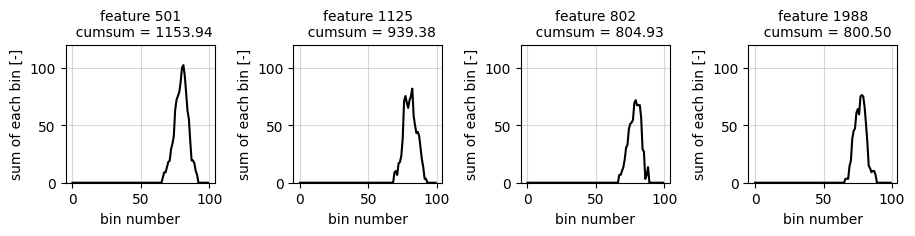

In [794]:
fig = plt.figure(figsize=(16, 4))
for i in range(4):
    col = cum_diff_list[i][0]
    ax = fig.add_subplot(2, 7, i+1)
    diff = np.abs(np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==1 , col], 
                                         bins=100, density=True, 
                                         range=(min_value, max_value)  # resample to have same binning
                                         )[0]) 
                  - np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==0 , col], 
                                           bins=100, density=True,
                                           range=(min_value, max_value)  # resample to have same binning
                                           )[0]))
    ax.plot(diff, color='black')
    ax.set_ylim(0, 120)

    ax.grid(alpha=0.5)
    ax.set_title(f"feature {col}\n  cumsum = {diff.sum():.2f}", fontsize=10)
    ax.set_xlabel(f"bin number")
    ax.set_ylabel(f"sum of each bin [-]")

plt.tight_layout()
plt.show()

fig.savefig("../figures/cumulative_histogram_diff.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

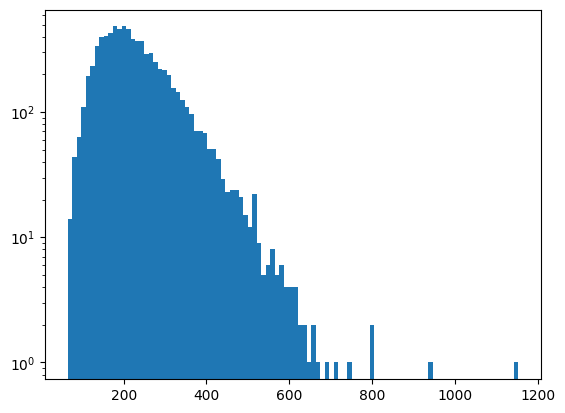

In [795]:
# plot histogram of cum_diff_list
plt.hist([x[1] for x in cum_diff_list], bins=100, log=True);

In [796]:
# create and print list of columns with the biggest difference
feature_list = [cum_diff_list[i][0] for i in range(14)]
print(feature_list)

feature_list_values = [cum_diff_list[i][1] for i in range(14)]
print(feature_list_values)


[501, 1125, 802, 1988, 2330, 4232, 3051, 3568, 6727, 2711, 1161, 6408, 7316, 1445]
[1153.9363757513402, 939.377443024769, 804.9321110545651, 800.5033236484858, 740.714693666441, 714.3792256981596, 685.4339365798683, 672.0684888722421, 661.9455462297799, 658.228528228251, 644.4676530736524, 641.5414899660661, 631.6558037917868, 630.3904359614803]
